In [3]:
# HCS Workshop 2, Web Scraping

In [4]:
# Author: Catherine Huang, Alyssa Huang, Andrew Nickerson

In [12]:
# import requests package and set up page

from bs4 import BeautifulSoup
import requests
page = requests.get("https://en.wikipedia.org/wiki/List_of_largest_cities")
print(page.status_code)
print(page.content)

soup = BeautifulSoup(page.content, 'html.parser')

200
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of largest cities - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2119591e-61a9-4f18-9f92-01cc7b209dd7","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_largest_cities","wgTitle":"List of largest cities","wgCurRevisionId":986819535,"wgRevisionId":986819535,"wgArticleId":14649921,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Portuguese-language sources (pt)","CS1 uses Chinese-language script (zh)","CS1 Chinese-language sources (zh)","All articles wi

In [13]:
# sortable wikitable mw-datatable jquery-tablesorter
content = soup.find(id='content')
bodyContent = content.find(id='bodyContent')
contentText= bodyContent.find(id='mw-content-text')
moreContent = contentText.find(class_='mw-parser-output')


tableContent = soup.find(class_='sortable wikitable mw-datatable')
print(type(tableContent))
children = tableContent.children

# print(children)

dict = {}

next = False

infos = list(tableContent.find_all('td'))
for i in range(len(infos)):
     thing = infos[i].find('a')
     if not (thing == None):
        city = thing.get('title')
        if not(city == None) and not('List of' in city) and not('Prefectures' in city):
            print(city, end = " ") 
        if not(city == None) and 'List of cities in' in city:
            country = city[17:]
            print(country, end = " ")
            next = True
     thing2 = list(infos[i].find_all('span'))
     if not (len(thing2) == 2) and not (len(thing2)==0):
         thing2 = thing2[0]
         if not(thing2 == None) and next:
            population = thing2.contents
            print(population)
            next = False

# Takes in city and country pair and maps to a dictionary
def loadDict(_city, _country, data):
    data[_city] = _country


<class 'bs4.element.Tag'>
Tokyo  Japan ['37,400,068']
Delhi  India ['28,514,000']
Union territory Shanghai  China ['25,582,000']
Direct-administered municipalities of China São Paulo  Brazil ['21,650,000']
Municipalities of Brazil Mexico City  Mexico ['21,581,000']
Cairo  Egypt ['20,076,000']
Governorates of Egypt Mumbai  India ['19,980,000']
Brihanmumbai Municipal Corporation Beijing  China ['19,618,000']
Direct-administered municipalities of China Dhaka  Bangladesh ['19,578,000']
Capital city Osaka  Japan ['19,281,000']
Cities designated by government ordinance of Japan New York City  the United States ['18,819,000']
 New York (state) ['8,398,748']
Karachi  Pakistan ['15,400,000']
Karachi Metropolitan Corporation Buenos Aires  Argentina ['14,967,000']
Autonomous city Chongqing  China ['14,838,000']
Direct-administered municipalities of China Istanbul  Turkey ['14,751,000']
Metropolitan municipalities in Turkey Kolkata  India ['14,681,000']
Kolkata Municipal Corporation Manila  Philip

In [14]:
# sortable wikitable mw-datatable jquery-tablesorter
content = soup.find(id='content')
bodyContent = content.find(id='bodyContent')
contentText= bodyContent.find(id='mw-content-text')
moreContent = contentText.find(class_='mw-parser-output')


tableContent = soup.find(class_='sortable wikitable mw-datatable')
# print(type(soup))
# print(type(bodyContent))
print(type(tableContent))
children = tableContent.children

cities = []
countries = []
populations = []
table_rows = tableContent.find_all('tr')
print(type(table_rows))
for row in table_rows[2:]:
    td = row.find('td')
    city = row.find('td').find('a').get('title')
    all_td = row.find_all('td')
    for td in all_td:
        link = td.find('a')
        if link == None:
            continue
        if link.get('title') == None:
            continue
        if 'List of cities in ' in link.get('title'):
            country = link.get('title').replace('List of cities in ', '')
            if country == 'the United States':
                country = 'United States'
            break
            
    spans = row.find_all('span')
    for span in spans:
        if span.get('data-sort-value') == None:
            continue
        population = int(span.decode_contents().replace(',', ''))
        break
    populations.append(population)
    
    cities.append(city)
    countries.append(country)
    print ((city, country, population))

    
print(cities)
print(countries)

data = {'cities': cities, 'countries': countries, 'populations': populations}

    # ok feel free to copy paste ur code above; i'm gonna work on the assumption that we have the correct city/country to read it into dict
    # i wasnt able to get the clean city so it'd be great for u to put that in lMAO
  
    # print(type(td))
    # cell = row.find_all('td')
#     links = list(td.find_all('a'))
#     # country = td[0].find('a').get('title')
#     # print(country)

# def parse_row(row):
#     td = row.find('td')
#     city = row.find('td').find('a').get('title')
#     all_td = row.find_all('td')
#     for td in all_td:
#         link = td.find('a')
#         if link == None:
#             continue
#         if link.get('title') == None:
#             continue
#         if 'List of cities in ' in link.get('title'):
#             if 'List of cities in the ' in link.get('title'):
#                 country = link.get('title').replace('List of cities in the ', '')
#                 break
#             else: 
#                 country = link.get('title').replace('List of cities in ', '')
#                 break
#     # return {
#     #     "city": city,
#     #     "country": country
#     # }
#     return (city, country, population)


<class 'bs4.element.Tag'>
<class 'bs4.element.ResultSet'>
('Tokyo', 'Japan', 37400068)
('Delhi', 'India', 28514000)
('Shanghai', 'China', 25582000)
('São Paulo', 'Brazil', 21650000)
('Mexico City', 'Mexico', 21581000)
('Cairo', 'Egypt', 20076000)
('Mumbai', 'India', 19980000)
('Beijing', 'China', 19618000)
('Dhaka', 'Bangladesh', 19578000)
('Osaka', 'Japan', 19281000)
('New York City', 'United States', 18819000)
('Karachi', 'Pakistan', 15400000)
('Buenos Aires', 'Argentina', 14967000)
('Chongqing', 'China', 14838000)
('Istanbul', 'Turkey', 14751000)
('Kolkata', 'India', 14681000)
('Manila', 'Philippines', 13482000)
('Lagos', 'Nigeria', 13463000)
('Rio de Janeiro', 'Brazil', 13293000)
('Tianjin', 'China', 13215000)
('Kinshasa', 'the Democratic Republic of the Congo', 13171000)
('Guangzhou', 'China', 12638000)
('Los Angeles', 'United States', 12458000)
('Moscow', 'Russia', 12410000)
('Shenzhen', 'China', 11908000)
('Lahore', 'Pakistan', 11738000)
('Bangalore', 'India', 11440000)
('Paris'

In [33]:
import pandas as pd

df = pd.DataFrame(data, index=cities)
df.set_index("cities",drop=True,inplace=True)
print(df)

                      countries  populations
cities                                      
Tokyo                     Japan     37400068
Delhi                     India     28514000
Shanghai                  China     25582000
São Paulo                Brazil     21650000
Mexico City              Mexico     21581000
...                         ...          ...
Washington, D.C.  United States      5207000
Yangon                  Myanmar      5157000
Alexandria                Egypt      5086000
Jinan                     China      5052000
Guadalajara              Mexico      5023000

[81 rows x 2 columns]


<AxesSubplot:xlabel='cities'>

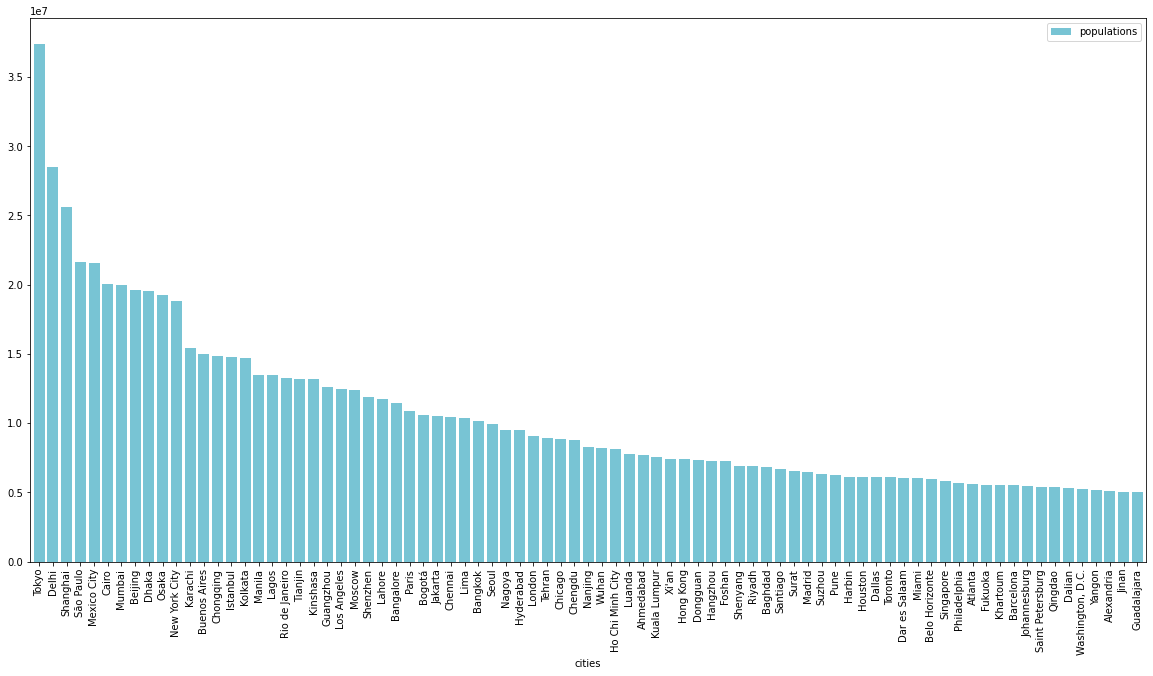

In [37]:
import matplotlib as plt

df.plot.bar(figsize=(20,10), width=0.8, color=['#78C4D4'])